# Baking with the Gemini API

To get started, [get an API key](https://g.co/ai/idxGetGeminiKey) and replace the word `TODO` below with your API key:

In [7]:
API_KEY = 'Your-API-Key'

Once you're done, create a text prompt here:

In [4]:
prompt = '''As a skilled medical practitioner specializing in image analysis, you are tasked with examining medical images for a renowned hospital. your expertise is crucial in identifying any anomalies, disease, or health issues that may be present in the images.

Your Responsibilities include:

1. Detailed Analysis: Thoroughly analyze each image,focusing on identifying any abnormal findings
2.Findings Report: Document all observed anomalies or signs of disease. Clearly articulate these findings in an structured format
3.Recommendation and Next steps: based on your analysis, suggest potential next steps, including further tests or treatments as applicable
4.Treatment Suggestion: If appropriate, recommend possible treatment options or intervention

Important Notes:
1.Scope of Response: Only respond if the image pertains to human health issues.
2.Clarity of Image: In cases where the image quality impedes clear analysis, note that certain aspects are 'Unable to be determine based on provided images.'
3.Disclaimer: Accompany your analysis with the disclaimer: "Consult with a doctor before making any decisions"
4.Your insights are invaluable in guiding clinical decisions. please proceed with the analysis, adhering to the structured approach outlined above 
5.Always provide the answers in english
 please provide me an output response with these 4 headings Detailed Analysis, Findings Report, Recommendation and Next steps, Treatment Suggestion. mostly give response in bulletin points and always remember to put the disclaimer at the end  '''

And load an image with PIL:

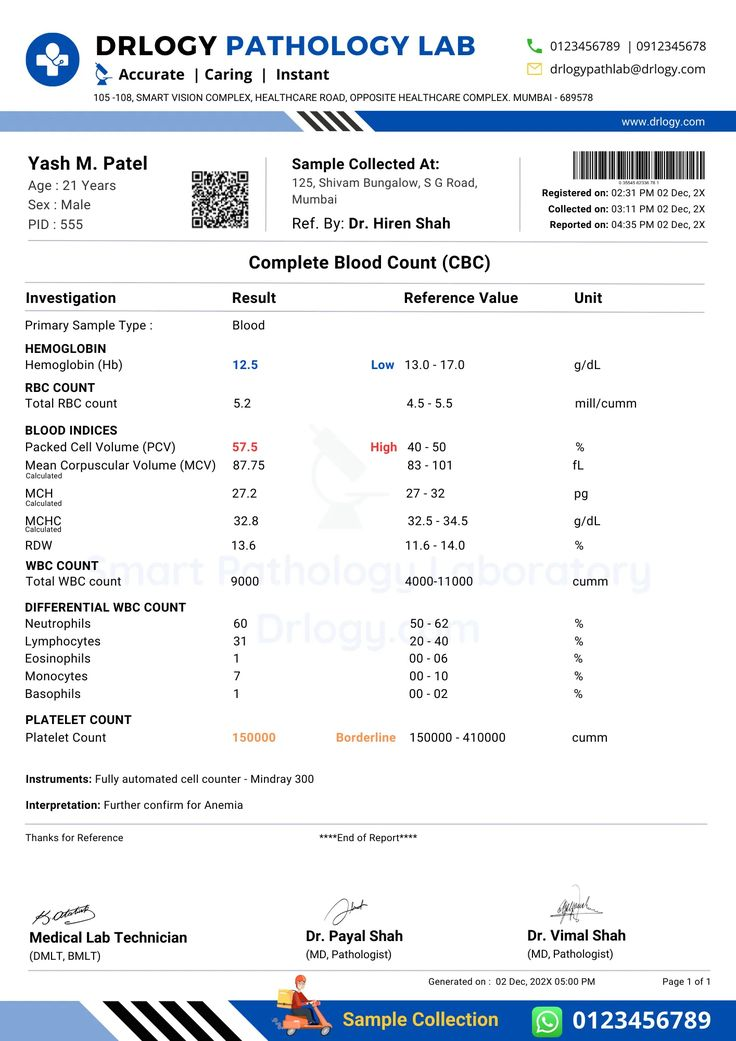

In [5]:
import PIL.Image
img = PIL.Image.open('1.png')
# img = PIL.Image.open('baked_goods_2.jpg')
# img = PIL.Image.open('baked_goods_3.jpg')
img

And finally, call the Gemini API using the Python client library. [See the docs](https://developers.generativeai.google/guide)

In [8]:
import google.generativeai as genai
from IPython.display import Markdown, clear_output, display

genai.configure(api_key=API_KEY)

model = genai.GenerativeModel(model_name='gemini-1.5-flash')  # or gemini-1.5-pro
response = model.generate_content([prompt, img], stream=True)

buffer = []
for chunk in response:
    for part in chunk.parts:
        buffer.append(part.text)
    clear_output()
    display(Markdown(''.join(buffer)))

**Detailed Analysis:**

* The provided image is a complete blood count (CBC) report for a 21-year-old male patient, Yash M. Patel.
* Hemoglobin levels are low (12.5 g/dL) compared to the reference range (13.0-17.0 g/dL).
* Packed Cell Volume (PCV) is high (57.5%) compared to the reference range (40-50%).

**Findings Report:**

* **Low Hemoglobin:**  Indicates anemia.  The low hemoglobin level suggests the body isn't carrying enough oxygen.
* **High Packed Cell Volume (PCV):**  This finding, in conjunction with low hemoglobin, suggests a relative polycythemia, where the percentage of red blood cells in the blood is increased, but the actual red blood cell mass may not be elevated.  This is often secondary to dehydration.  This needs to be clarified with further investigation.

**Recommendation and Next Steps:**

* **Rehydration assessment:**  Assess the patient's hydration status.  Dehydration can artificially elevate PCV and hematocrit.
* **Repeat CBC:** Repeat the complete blood count after appropriate rehydration to rule out dehydration as a cause of the high PCV.
* **Peripheral blood smear:** Perform a peripheral blood smear examination to assess the morphology of red blood cells and identify any abnormalities, e.g., size, shape, color, presence of inclusion bodies that might give clues about the cause of anemia.
* **Iron studies:** Assess serum iron levels, total iron-binding capacity (TIBC), ferritin levels to evaluate for iron deficiency anemia.
* **Further investigation into the cause of anemia:** Depending on the results of the above tests, further investigations may be necessary, such as reticulocyte count, vitamin B12 and folate levels, bone marrow examination, if the anemia is severe or unexplained.

**Treatment Suggestion:**

* **Address underlying cause:** Treatment will depend on the identified cause of the anemia. If iron deficiency is confirmed, iron supplementation might be necessary. If the anemia is due to another cause (e.g., nutritional deficiency, bone marrow disorder), treatment will be directed to address the root cause.
* **Hydration:** If dehydration is found to be a factor, intravenous or oral rehydration therapy will be recommended.

Consult with a doctor before making any decisions.
